# Análisis Exploratorio de Datos

En este notebook exploraremos visual y estadísticamente las variables estructurales, de exterior y calidad para identificar patrones, relaciones y comportamientos relevantes que puedan influir en el precio de venta (`SalePrice`).

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from housing_price_prediction.utils.paths import data_raw_dir
from housing_price_prediction.utils.paths import data_interim_dir

raw_data_path = data_raw_dir() / "train.csv"
train_path = data_interim_dir() / "train_cleaned.csv"
df = pd.read_csv(train_path)
df_raw = pd.read_csv(raw_data_path)


Llevaremos a cabo estas fases:
1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir 

# Análisis de cada variable de manera individual

Nos permite entender las carácterísticas generales de cada variable de nuestro set de datos

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1460 non-null   int64  
 1   OverallCond   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   RoofStyle     1460 non-null   object 
 5   RoofMatl      1460 non-null   object 
 6   Exterior1st   1460 non-null   object 
 7   Exterior2nd   1460 non-null   object 
 8   MasVnrType    588 non-null    object 
 9   MasVnrArea    1460 non-null   float64
 10  ExterQual     1460 non-null   int64  
 11  ExterCond     1460 non-null   int64  
 12  Foundation    1460 non-null   object 
 13  Heating       1460 non-null   object 
 14  HeatingQC     1460 non-null   int64  
 15  CentralAir    1460 non-null   object 
 16  Electrical    1460 non-null   object 
dtypes: float64(1), int64(7), object(9)
memory usage: 194.0+ KB


Tomamos las variables categóricas y generaremos  gráficos de barras

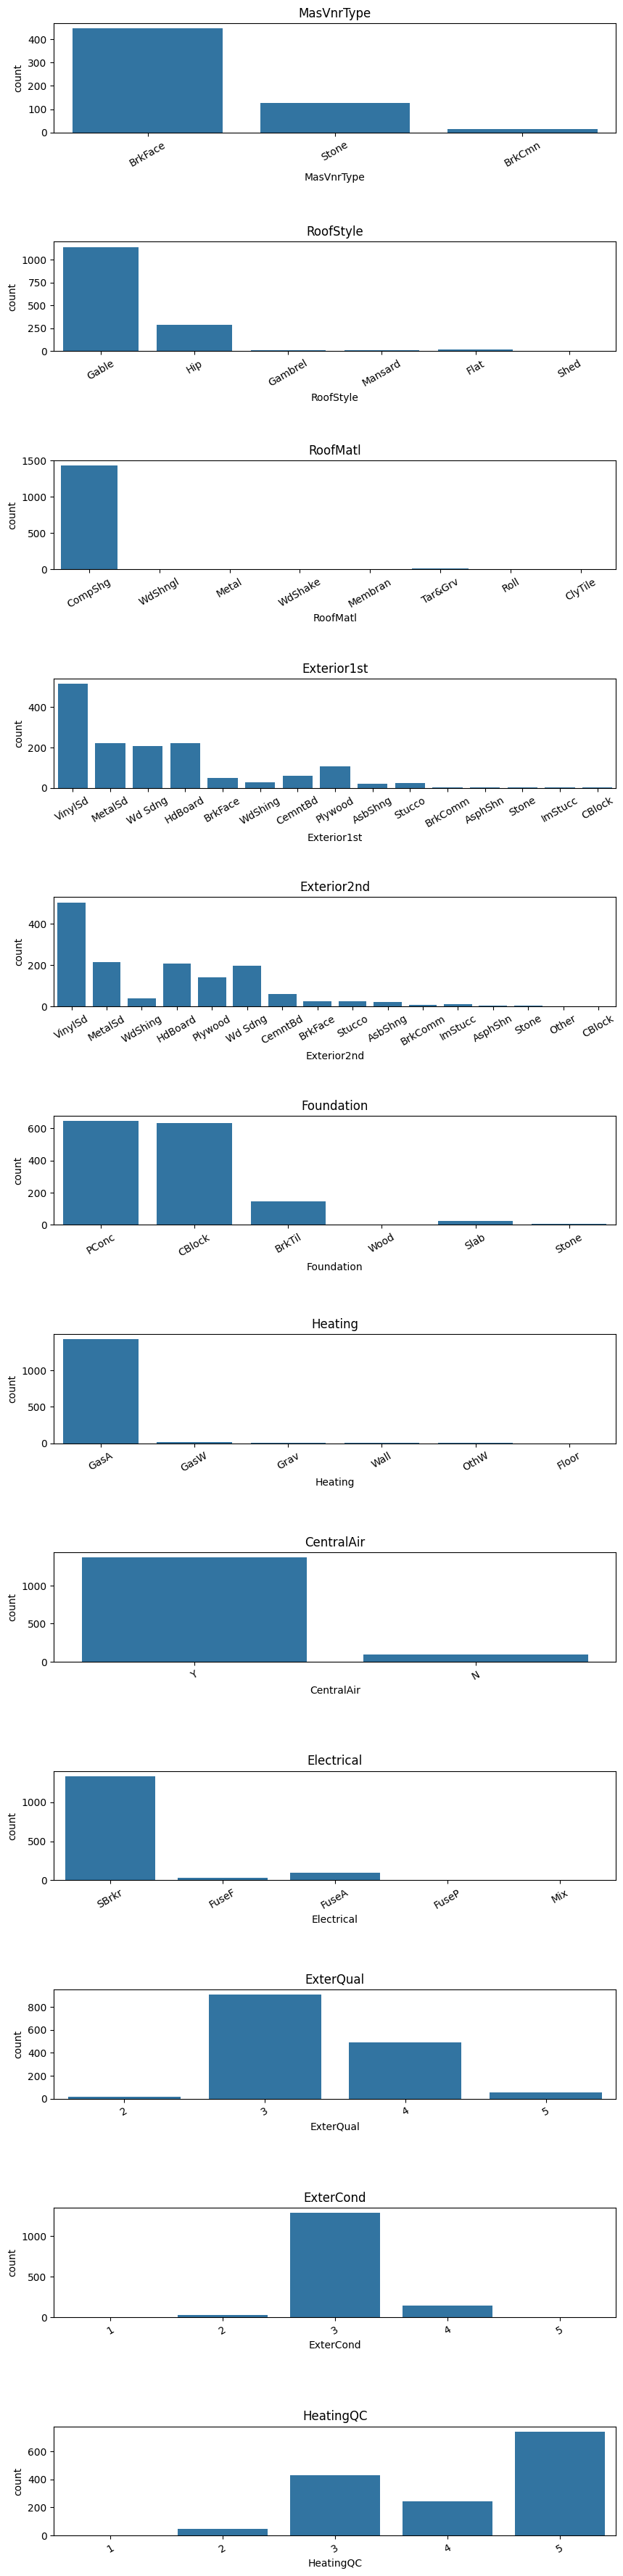

In [35]:
cat_cols = [
    'MasVnrType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'Foundation', 'Heating', 'CentralAir', 'Electrical',
    'ExterQual', 'ExterCond', 'HeatingQC'
]

fig, ax = plt.subplots(nrows = len(cat_cols), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data= df, ax= ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation=30)
    

**Observaciones**

- MasVnrType: Predomina el tipo BrkFace, lo que sugiere que la mayoría de casas tienen un acabado de ladrillo visto.
- RoofStyle: La gran mayoría presenta techos tipo Gable (a dos aguas), con poca diversidad de estilos.
- RoofMatl: El material CompShg (tejas compuestas) es casi exclusivo, indicando un patrón constructivo muy homogéneo.
- Exterior1st/Exterior2nd: VinylSd y MetalSd son los recubrimientos exteriores más comunes.
- Foundation: Predominan PConc y CBlock, que son las bases más modernas y sólidas.
- Heating y CentralAir: Casi todas las viviendas usan calefacción a gas (GasA) y disponen de aire acondicionado central (Y).
- Electrical: La mayoría cuenta con instalación SBrkr, lo que refleja una infraestructura eléctrica estándar.
- ExterQual, ExterCond, HeatingQC: Se concentran en valores medios-altos, lo que sugiere que la calidad exterior y de calefacción de la mayoría de las casas es buena o típica.

Tras el análisis exploratorio, se identificaron varias variables con **baja variabilidad o redundancia**, las cuales no aportan valor predictivo al modelo:

- **RoofMatl:** Casi todas las viviendas usan el mismo material (*CompShg*).  
- **Heating:** Más del 90% utilizan calefacción a gas (*GasA*).  
- **Electrical:** Predomina el sistema estándar (*SBrkr*).  
- **ExterCond:** Más del 80 % son “TA”, entonces no aporta información útil

In [36]:
#Eliminamos las columnas "RoofMatl","Heating", "Electrical" pues no aportan información para el valor predictivo
df.drop(columns=[
    'RoofMatl', 'Heating', 'Electrical', 'ExterCond'
],inplace=True)

df.columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'HeatingQC', 'CentralAir'],
      dtype='object')

Veamos el comportamiento de las variables numéricas

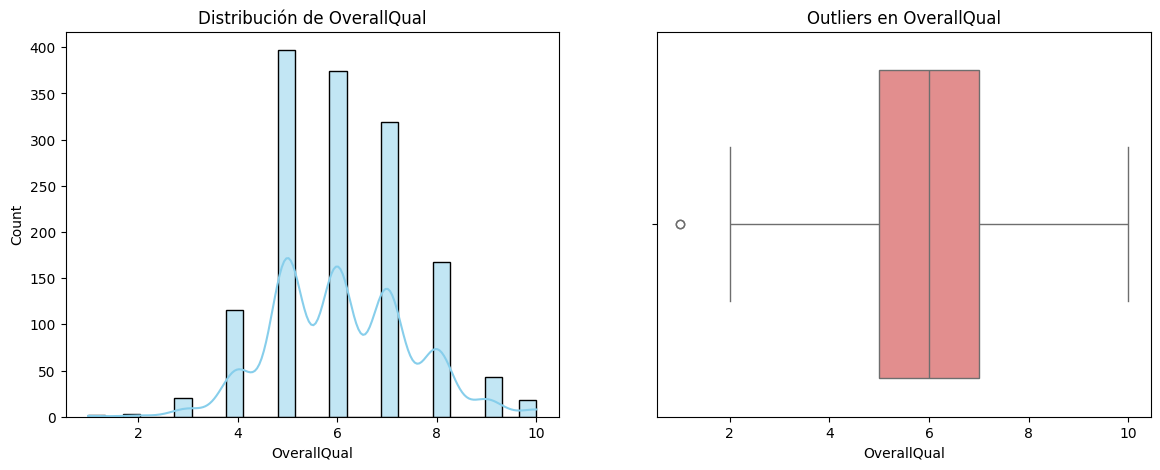

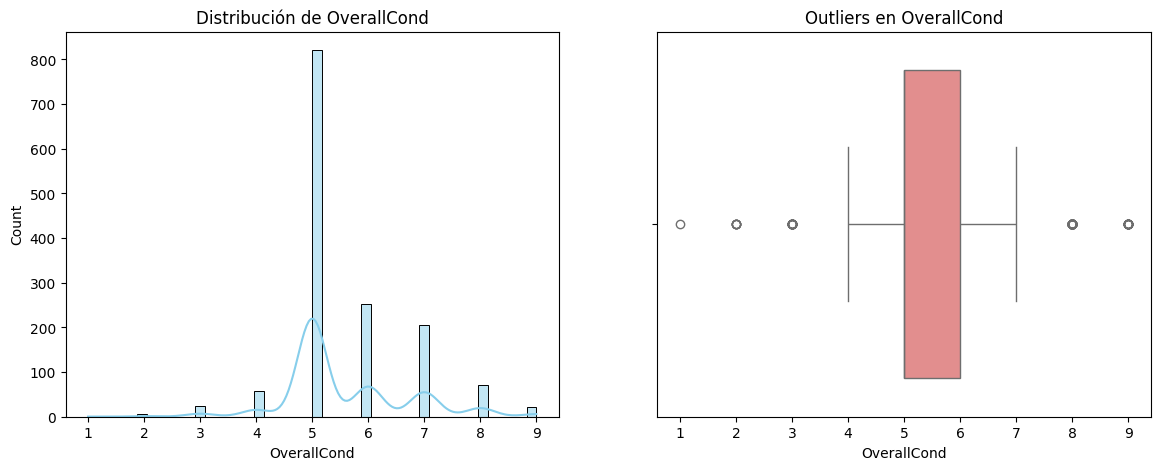

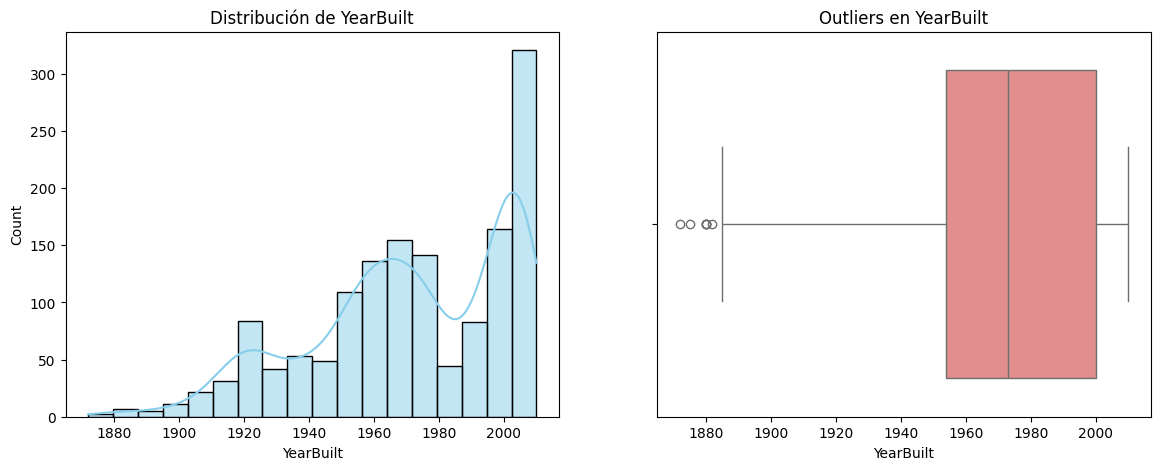

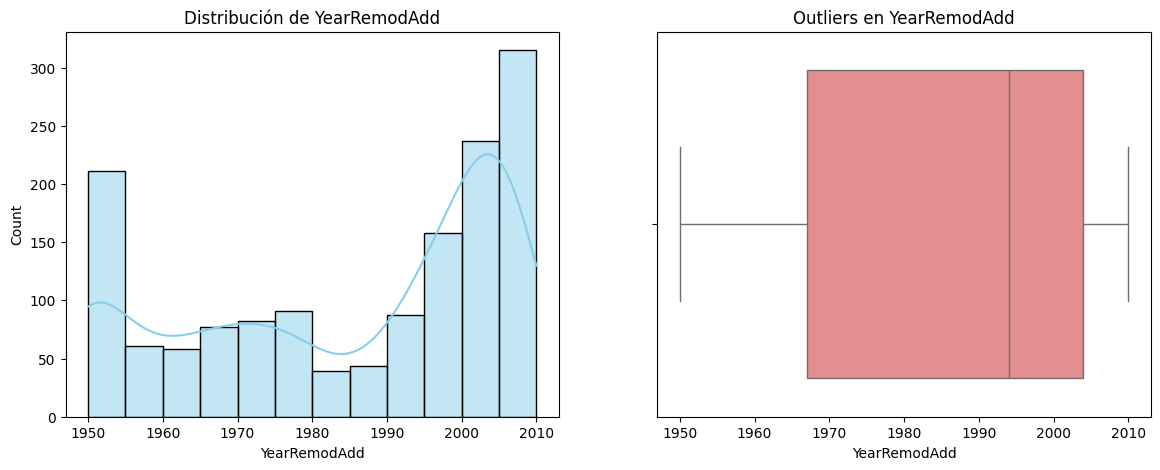

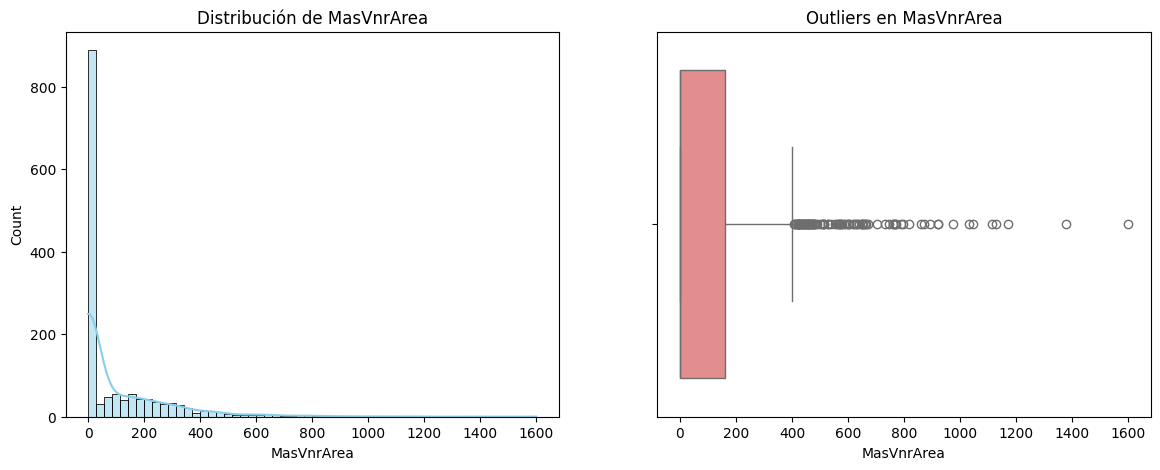

In [37]:
num_cols = ["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea"]

for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    
    sns.histplot(df[col], kde=True, ax=ax[0], color='skyblue')
    sns.boxplot(x=df[col], ax=ax[1], color='lightcoral')
    
    ax[0].set_title(f"Distribución de {col}")
    ax[1].set_title(f"Outliers en {col}")
    plt.show()



**Observación**

- **OverallQual:** Presenta una tendencia hacia valores medios-altos, lo que indica que la mayoría de viviendas tienen buena calidad general.  
- **OverallCond:** Tiende a concentrarse en valores promedio (5), lo que sugiere que pocas casas están en condiciones muy malas o excelentes.  
- **YearBuilt:** Muestra un aumento claro en la construcción de viviendas a partir de los años 1950–2000, lo que refleja un auge inmobiliario reciente.  
- **YearRemodAdd:** La mayoría de remodelaciones se concentran en fechas posteriores a 1990, lo cual puede tener impacto positivo en el precio.  
- **MasVnrArea:** Tiene muchos ceros (casas sin revestimiento de mampostería) y una distribución sesgada hacia valores bajos, lo que podría requerir transformación logarítmica para el modelado.


En general, no se identifican outliers que afecten negativamente la calidad del análisis o que requieran eliminación.

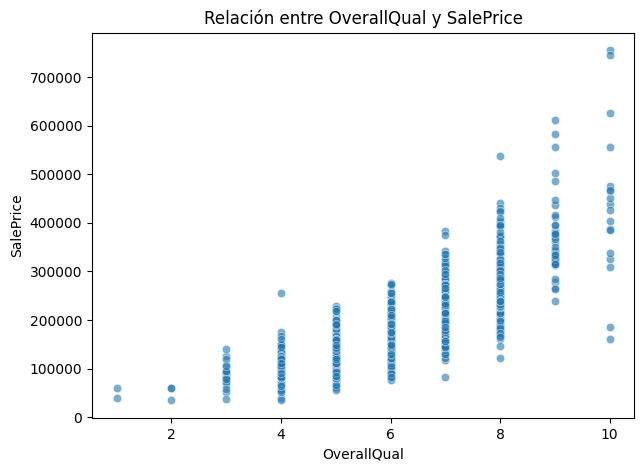

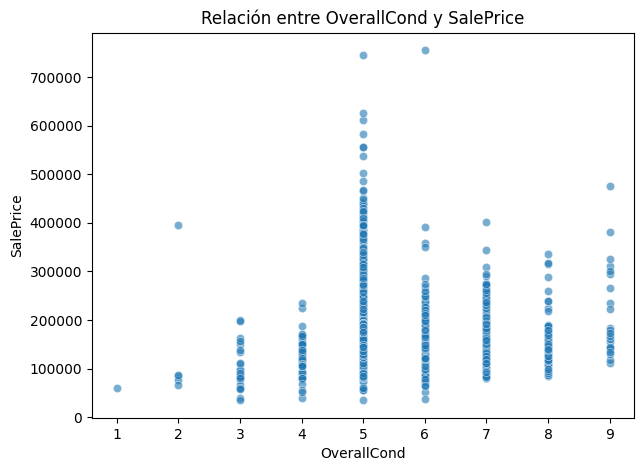

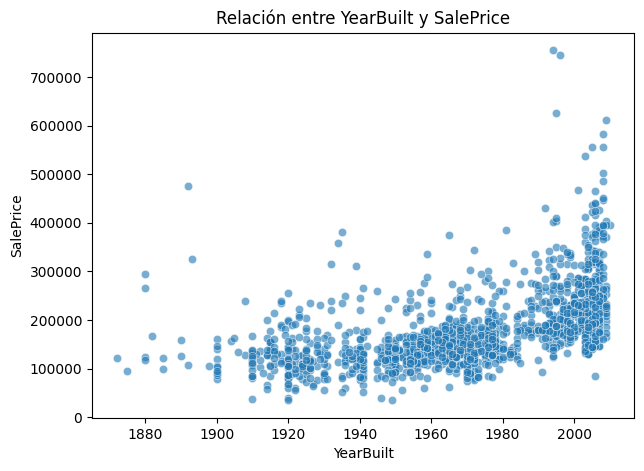

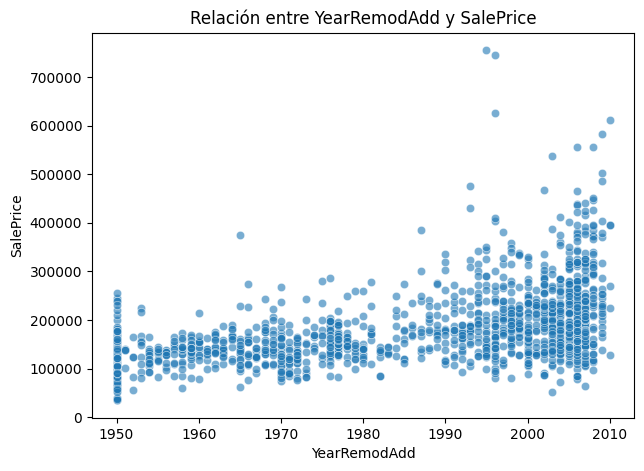

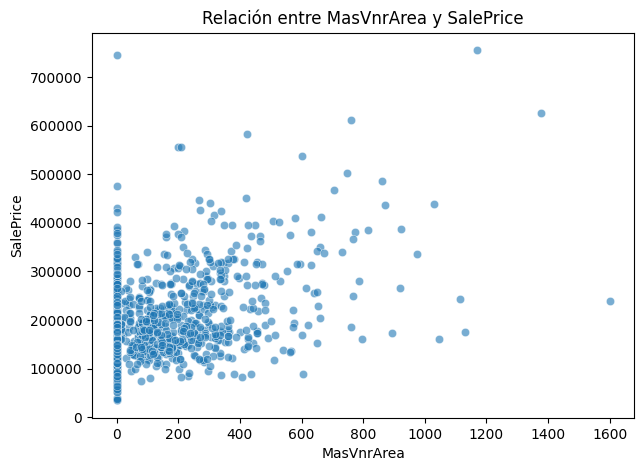

In [38]:
for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=col, y="SalePrice", data=df_raw, alpha=0.6)
    plt.title(f"Relación entre {col} y SalePrice")
    plt.show()



- **OverallQual** es la variable con mayor correlación positiva con `SalePrice`, confirmando que una mejor calidad general eleva el valor de la vivienda.  
- **YearBuilt** y **YearRemodAdd** también muestran correlación moderada: las casas más nuevas o remodeladas tienden a tener precios mayores.  
- **MasVnrArea** tiene una relación positiva, aunque menos fuerte, indicando que el área de revestimiento en piedra/ladrillo puede influir levemente en el precio.  
- **OverallCond** tiene una correlación débil, lo que sugiere que el estado general (mantenimiento) no impacta tanto como la calidad de construcción.


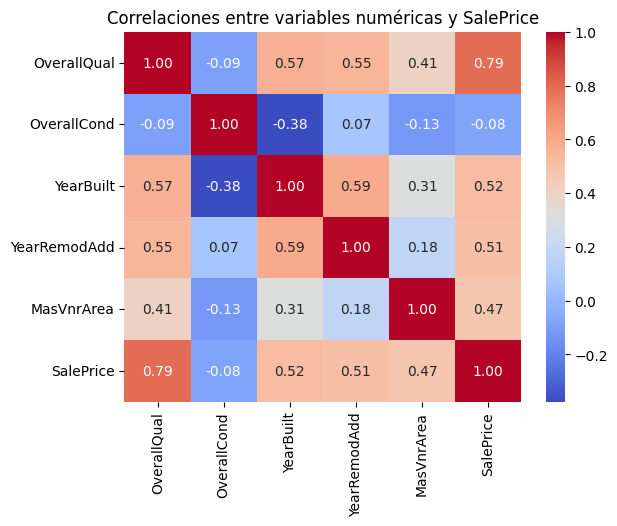

In [44]:
# DataFrame temporal para correlaciones
df_corr = df[num_cols].copy()
df_corr["SalePrice"] = df_raw["SalePrice"]

corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas y SalePrice")
plt.show()


El mapa de calor muestra la relación entre las variables estructurales del conjunto del *Inspector* y el precio de venta (`SalePrice`).

- **OverallQual** es la variable con mayor correlación positiva (0.79), evidenciando que la calidad general de la vivienda es el factor más determinante del precio.  
- **YearBuilt** (0.52) y **YearRemodAdd** (0.51) también presentan correlaciones moderadas positivas, lo que sugiere que las casas más nuevas o remodeladas tienden a tener un mayor valor de mercado.  
- **MasVnrArea** (0.47) influye de forma moderada, indicando que un mayor revestimiento exterior suele asociarse con precios más altos.  
- **OverallCond** muestra una correlación débil (-0.08), por lo que su impacto directo en el precio parece poco relevante.

En conjunto, se confirma que las variables relacionadas con **la calidad y la modernidad de la vivienda** son las que mejor explican las variaciones en el precio de venta.